### Auteur : MOUDILA Marcel

### Examen de travaux pratiques - EC Clustering



1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

5. Number of Instances: 398

6. Number of Attributes: 9 including the class attribute

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)


8. Missing Attribute Values:  horsepower has 6 missing values


### Exercice 1 : Analyse des données

In [94]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

#### 1. Téléchargement des données

In [4]:
df = pd.read_csv("auto-mpg.csv", header= None)
vect = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df.columns = vect
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


#### 2. Analyse des données

##### a) Exploration 

In [6]:
df.shape

(398, 9)

Commentaires : 
- nous constatons que le jeu comporte 398 lignes et 9 colonnes.

In [7]:
df.describe().iloc[:,[0,2,3,4,5]]

,mpg,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,392.000000,398.000000,398.000000
mean,23.514573,193.425879,104.469388,2970.424623,15.568090
std,7.815984,104.269838,38.491160,846.841774,2.757689
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,104.250000,75.000000,2223.750000,13.825000
50%,23.000000,148.500000,93.500000,2803.500000,15.500000
75%,29.000000,262.000000,126.000000,3608.000000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


Commentaires : 
- les statistiques descriptives des variables quantitatives montrent grâce à la ligne count que la variable

"horsepower" a 6 valeurs manquantes, car seulement 392 lignes de cette variable présentent des données.

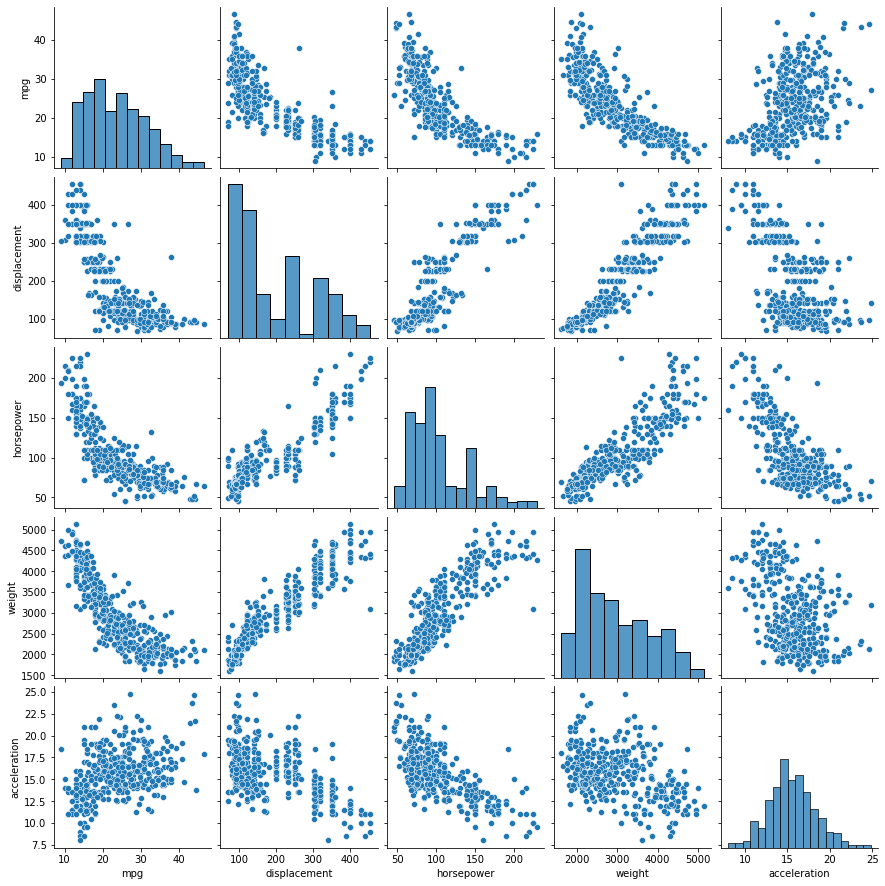

In [8]:
sns.pairplot(df.iloc[:,[0,2,3,4,5]])

commentaires : 
- la valeur de "mpg" augmente quand la valeur de "acceleration" augmente . 

- Pour les autres attributs quantitatifs, la valeur de "mpg" diminue quand leurs valeurs augmentent.

<AxesSubplot:>

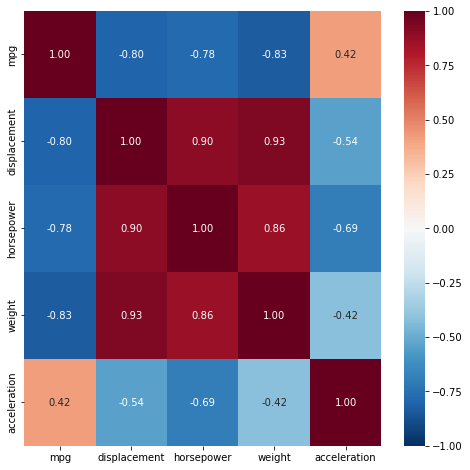

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.iloc[:,[0,2,3,4,5]].corr(method="pearson"), 
            fmt= ".2f", annot=True, ax = ax, cmap = "RdBu_r", vmin = -1, vmax = 1)

Commentaires : 
- on constate une corrélation positive faible entre "mpg" et "accelaration"

- les autres variables quantitatives sont fortement corrélées négativement avec "mpg"

In [10]:
data = df.copy()
data["cylinders"] = data["cylinders"].astype("category")
data["model year"] = data["model year"].astype("category")
data["origin"] = data["origin"].astype("category")

<AxesSubplot:xlabel='origin', ylabel='Count'>

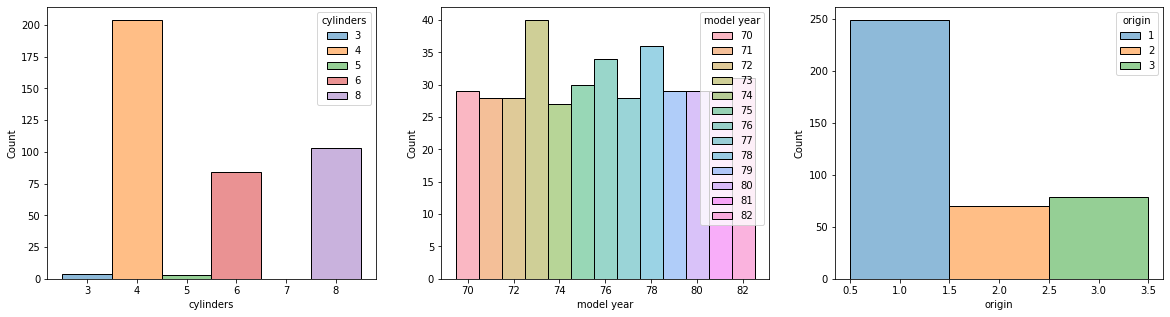

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(data, x = "cylinders", hue = "cylinders" )
plt.subplot(1,3,2)
sns.histplot(data, x = "model year", hue = "model year" )
plt.subplot(1,3,3)
sns.histplot(data, x = "origin", hue = "origin" )


commentaires : 
- "cylinders" : les voitures avec 3 cylindres , les voitures avec 5 cylindres sont très peu dans le jeu des données

- "model year": on constate un bon mélange des années de construction des voitures entre 1970 et 1982 dans le jeu des données

- "origin" : les voitures d'origine le label 1 sont majoritaires dans le jeu de données

               

<AxesSubplot:xlabel='origin', ylabel='mpg'>

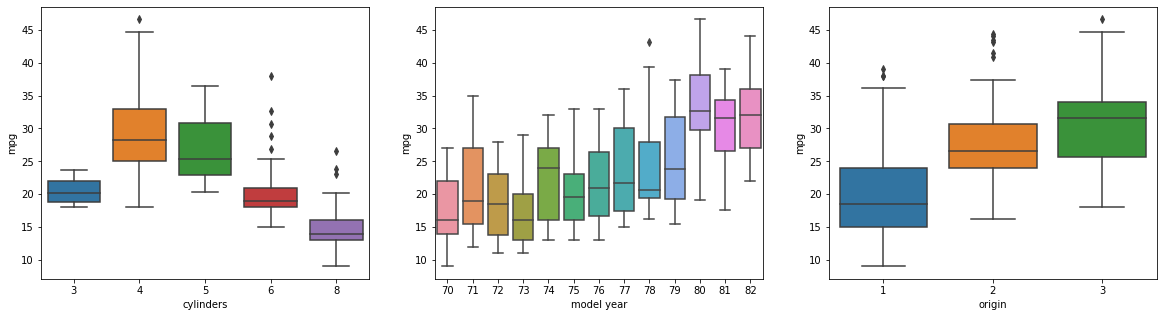

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data = data, x = "cylinders", y = "mpg" )
plt.subplot(1,3,2)
sns.boxplot(data = data, x = "model year", y = "mpg" )
plt.subplot(1,3,3)
sns.boxplot(data = data, x = "origin", y = "mpg" )

#### a.3) Exploration des données manquantes

In [13]:
df.isnull().mean()*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model year      0.000000
origin          0.000000
car name        0.000000
dtype: float64

Commentaire :
- en pourcentage , les 6 valeurs manquantes qu'on a avait trouvé dans les statistiques descriptives 

de la "horsepower" ne réprésentent que 1,5 % . Dans le reste des variables, on n'a pas des données manquantes.

##### b) Nettoyage

In [14]:
df.columns = df.columns.str.replace('model year','model_year')

In [15]:
df = df.dropna()
df.shape

(392, 9)

Commentaire : 
- nous remplacé le nom la variable "model year" par "model_year" 

- nous avons supprimer les lignes contenant les valeurs manquantes

il y'en avait que 6, ce qui rend notre jeu de données à 392 lignes.

### Fin excercice 1

### Exercice 2 : Régression

#### 1) Préparation des données pour prédire la variable mpg

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# copie du dataset 
df2 = df.copy()

# suppression de "car name"
df2 = df2.drop(columns=['car name'])

# renommage de "mpg" par target
df2.columns = df2.columns.str.replace('mpg','target')

# selection des covariables 
X = df2.iloc[:,1:]

# selection de la variable cible
Y = df2.iloc[:,0]

In [18]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [19]:
Y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: target, dtype: float64

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

Commentaire : 
- il faut toujours appliquer l'entraînement et les tests sur des données différentes. 

c'est le seul moyen de vraiment savoir si le modèle peut bien s'appliquer à des 

nouvelles données. ici nous choisissons de prélever 30 % du volume des données pour 

les tests. 

#### 2) Entraînement d'un arbre de régression de type CART

In [21]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
# les paramètres définis
dtr.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

#### 3) Visualisation de l'arbre

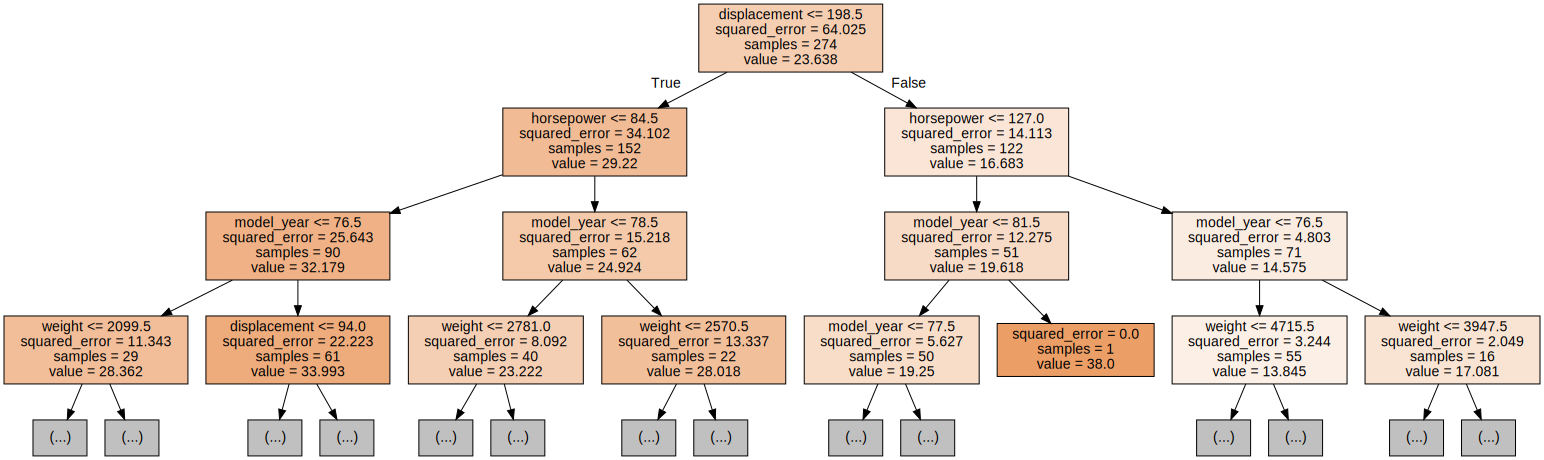

In [23]:
# visualisation de l'arbre de décision (pip install graphviz, avant d'importer le module graphviz)
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtr,feature_names=X_train.columns, filled=True, max_depth=3)
graph = graphviz.Source(dot_data)
graph

Commentaire : 
- on n'a limité  la profondeur de l'arbre à 3. 

- le split (la fonction de division) est l'erreur quadratique 

#### 4) Importance des variables

In [24]:
dtr.feature_importances_

array([0.0030974 , 0.642273  , 0.1697327 , 0.06259658, 0.01996493,
       0.0968416 , 0.0054938 ])

In [25]:
# affichage de l'importance des variables
for i in range(len(X_train.columns)) :
    print(X_train.columns[i],"              :", dtr.feature_importances_[i]*100)

cylinders               : 0.3097397168954777
displacement               : 64.22729985061268
horsepower               : 16.973269830399616
weight               : 6.259658078387457
acceleration               : 1.9964929626693144
model_year               : 9.684159631862295
origin               : 0.5493799291731479


Commentaire : 
- plus grande est la valeur, plus importante est la variable

- par ordre d'importance , on a : "displacement", "horsepower", "model_year", "weight", "accelaration", "origin", et "cylinders"

- une valeur plus élevée signifie qu'il y'aura plus d'erreur si la variable est supprimée du modèle


Text(0.5, 1.0, 'importance des variables pour DecisionTreeRegressor')

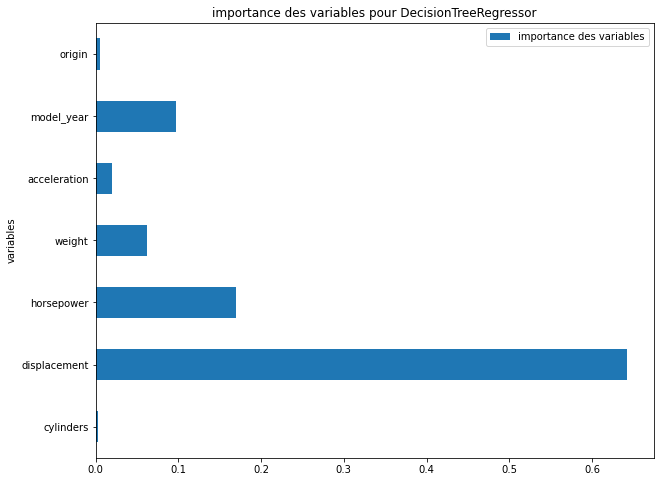

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
(pd.DataFrame({"variables" : X_train.columns, "importance des variables" : dtr.feature_importances_})
.set_index("variables")
.plot.barh(ax=ax)
)
plt.title("importance des variables pour DecisionTreeRegressor")

#### 5) Affichage des valeurs pour certaines métriques 

In [27]:
Y_pred_dtr = dtr.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
pd.DataFrame({"mean squared error" : [mean_squared_error(Y_test,Y_pred_dtr)],
              "mean absolute error" : [mean_absolute_error(Y_test,Y_pred_dtr)],
              "R2" : [r2_score(Y_test,Y_pred_dtr)]},
              index = ["decision tree regressor"])

,mean squared error,mean absolute error,R2
decision tree regressor,12.160254,2.411017,0.770149


### Proposition d'amélioration

In [101]:
# GreadSearchCV
from sklearn.model_selection import GridSearchCV

# Fixer les valeurs des hyperparamètres à tester
param_grid = {
             'max_depth':[2,3,4,5,6,7,8,9,10]} 

score = 'r2'

model = GridSearchCV(
    DecisionTreeRegressor(), # un regresseur 
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce model sur le jeu d'entraînement
model.fit(X_train, Y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(model.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        model.cv_results_['mean_test_score'], # score moyen
        model.cv_results_['std_test_score'],  # écart-type du score
        model.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 5}
Résultats de la validation croisée :
r2 = 0.700 (+/-0.174) for {'max_depth': 2}
r2 = 0.746 (+/-0.127) for {'max_depth': 3}
r2 = 0.803 (+/-0.104) for {'max_depth': 4}
r2 = 0.812 (+/-0.062) for {'max_depth': 5}
r2 = 0.796 (+/-0.116) for {'max_depth': 6}
r2 = 0.789 (+/-0.074) for {'max_depth': 7}
r2 = 0.760 (+/-0.127) for {'max_depth': 8}
r2 = 0.778 (+/-0.084) for {'max_depth': 9}
r2 = 0.772 (+/-0.124) for {'max_depth': 10}


In [102]:
y_pred = model.predict(X_test)
print("\n R2 sur le jeu de test : {:.3f}".format(r2_score(Y_test, y_pred)))
print("\n mean squared error sur le jeu de test : {:.3f}".format(mean_squared_error(Y_test, y_pred)))
print("\n mean absolute error sur le jeu de test : {:.3f}".format(mean_absolute_error(Y_test, y_pred)))



 R2 sur le jeu de test : 0.809

 mean squared error sur le jeu de test : 10.094

 mean absolute error sur le jeu de test : 2.304


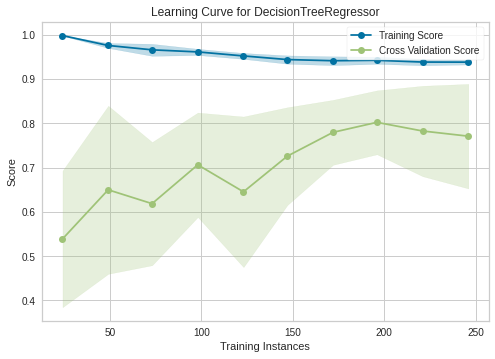

In [103]:
model = DecisionTreeRegressor(max_depth=5)
graphiqueValidation(model)

#### 6) Forêts aléatoires de régression 

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rfr = RandomForestRegressor()

In [105]:
# les paramètres définis
rfr.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [106]:
rfr.fit(X_train,Y_train)

RandomForestRegressor()

Text(0.5, 1.0, 'importance des variables pour RandomForestRegressor')

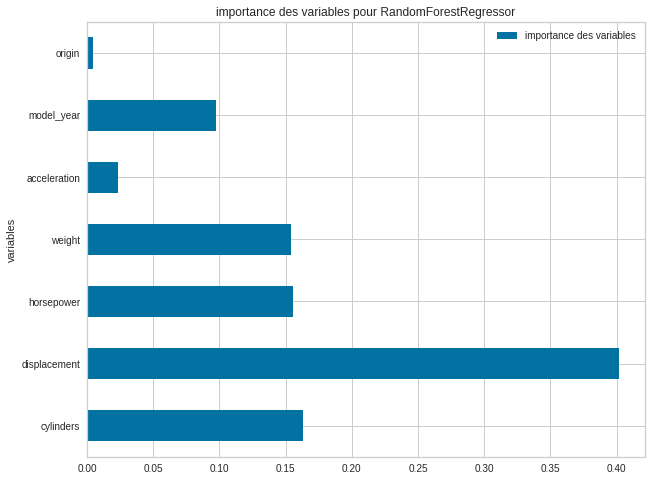

In [107]:
fig, ax = plt.subplots(figsize=(10,8))
(pd.DataFrame({"variables" : X_train.columns, 
               "importance des variables" : rfr.feature_importances_})
.set_index("variables")
.plot.barh(ax=ax)
)
plt.title("importance des variables pour RandomForestRegressor")

In [108]:
Y_pred_rfr = rfr.predict(X_test)

In [109]:

pd.DataFrame({"mean squared error" : [mean_squared_error(Y_test,Y_pred_dtr), mean_squared_error(Y_test,Y_pred_rfr)],
              "mean absolute error" : [mean_absolute_error(Y_test,Y_pred_dtr), mean_absolute_error(Y_test,Y_pred_rfr) ],
              "R2" : [r2_score(Y_test,Y_pred_dtr), r2_score(Y_test,Y_pred_rfr) ]},
              index = ["decision tree regressor", " random forest regressor"])

,mean squared error,mean absolute error,R2
decision tree regressor,12.160254,2.411017,0.770149
random forest regressor,7.076398,1.852280,0.866243


Commentaire : 
- le meilleur modèle est random forest regressor parmi les deux testés.

## Proposition d'améliorattion

In [110]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {
             'max_depth':[2,3,4,5,6,7,8,9,10], 
             'n_estimators' :[100,150,200,250,300,400,500] 
              }

score = 'r2'

model = GridSearchCV(
    RandomForestRegressor(), # un regresseur 
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce model sur le jeu d'entraînement
model.fit(X_train, Y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(model.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        model.cv_results_['mean_test_score'], # score moyen
        model.cv_results_['std_test_score'],  # écart-type du score
        model.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 10, 'n_estimators': 250}
Résultats de la validation croisée :
r2 = 0.745 (+/-0.186) for {'max_depth': 2, 'n_estimators': 100}
r2 = 0.749 (+/-0.178) for {'max_depth': 2, 'n_estimators': 150}
r2 = 0.750 (+/-0.183) for {'max_depth': 2, 'n_estimators': 200}
r2 = 0.749 (+/-0.179) for {'max_depth': 2, 'n_estimators': 250}
r2 = 0.749 (+/-0.178) for {'max_depth': 2, 'n_estimators': 300}
r2 = 0.748 (+/-0.181) for {'max_depth': 2, 'n_estimators': 400}
r2 = 0.749 (+/-0.179) for {'max_depth': 2, 'n_estimators': 500}
r2 = 0.824 (+/-0.106) for {'max_depth': 3, 'n_estimators': 100}
r2 = 0.821 (+/-0.106) for {'max_depth': 3, 'n_estimators': 150}
r2 = 0.824 (+/-0.110) for {'max_depth': 3, 'n_estimators': 200}
r2 = 0.825 (+/-0.106) for {'max_depth': 3, 'n_estimators': 250}
r2 = 0.823 (+/-0.106) for {'max_depth': 3, 'n_estimators': 300}
r2 = 0.825 (+/-0.106) for {'max_depth': 3, 'n_estimators': 400}
r2 = 0.825 (+/-0.104) for {'max_dep

In [111]:
y_pred = model.predict(X_test)
print("\n R2 sur le jeu de test : {:.3f}".format(r2_score(Y_test, y_pred)))
print("\n mean squared error sur le jeu de test : {:.3f}".format(mean_squared_error(Y_test, y_pred)))
print("\n mean absolute error sur le jeu de test : {:.3f}".format(mean_absolute_error(Y_test, y_pred)))



 R2 sur le jeu de test : 0.869

 mean squared error sur le jeu de test : 6.951

 mean absolute error sur le jeu de test : 1.832


In [71]:
from yellowbrick.model_selection import LearningCurve 

def graphiqueValidation(model):
    visualizer = LearningCurve(model, scoring='r2',cv = 10,train_sizes=np.linspace(0.1,1,10))
    visualizer.fit(X_train, Y_train)
    visualizer.show()

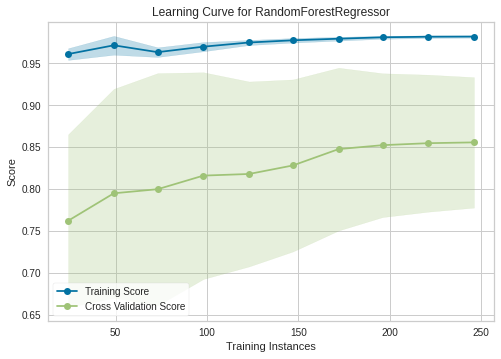

In [112]:
model = RandomForestRegressor(n_estimators = 500, max_depth = 10)
graphiqueValidation(model)

### Fin Exercice 2

### Exercice 3: Clustering

#### 1) Préparation des données

In [36]:
df3 = df.copy()
df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [37]:
X = df3.iloc[:,:-1]
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Commentaire :
- la variable "car name" servira d'étiquettes et ne sera pas prise comme variable d'entrée

In [38]:
from sklearn.preprocessing import StandardScaler

# standardisation des données
standardiseur = StandardScaler()
X_scale = standardiseur.fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns=X.columns)
X_scale



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641
...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.716641
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641


Commentaire : 
- il n'est pas judicieux de normaliser toutes les valeurs entre 0 et 1 (celà suppose que 

toutes les variables sont ordonnées or ce n'est pas le cas. la variable origin(1,2,3) par exemple
n'a pas de relation d'ordre)

- c'est pourquoi on standardise en prenant en compte toutes les valeurs numériques passées dans le jeu

d'entrainement X

#### 2) ACP

#### 2.1) Recherche du nombre de composantes principales

In [39]:
from sklearn.decomposition import PCA 

pca = PCA(random_state=42)
pca.get_params(deep=True)

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': 42,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [40]:
X_pca = pca.fit_transform(X_scale)

In [41]:
pca.explained_variance_ratio_

array([0.67198404, 0.11795791, 0.10145546, 0.06076949, 0.02285332,
       0.01429024, 0.00669335, 0.00399619])

Commentaire : 
- la première composante principale stocke  67% de la variance.

- la deuxième composante principale stocke  11% de la variance 

- la troisième composante principale stocke 10% de la variance

Text(0, 0.5, 'pourcentage de variance expliquée')

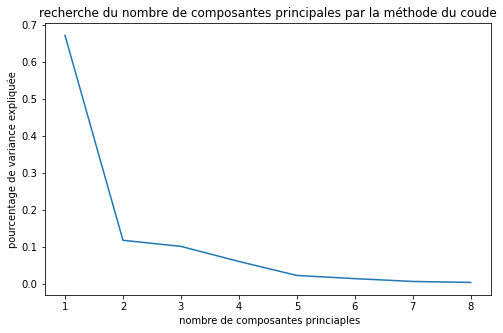

In [42]:
plt.figure(figsize=(8,5))
plt.plot(range(1,9), pca.explained_variance_ratio_)
plt.title("recherche du nombre de composantes principales par la méthode du coude")
plt.xlabel(" nombre de composantes princiaples")
plt.ylabel("pourcentage de variance expliquée")

Commentaire : 
- on voit que par la méthode du coude, on peut choisir 3 composantes principales

In [43]:
np.cumsum(pca.explained_variance_ratio_)

array([0.67198404, 0.78994195, 0.8913974 , 0.95216689, 0.97502021,
       0.98931046, 0.99600381, 1.        ])

Commentaire : 
- les trois premières composantes principales préservent 89 % de la variance 

- voir graphique ci-dessous

Text(0, 0.5, 'pourcentage de variance expliquée')

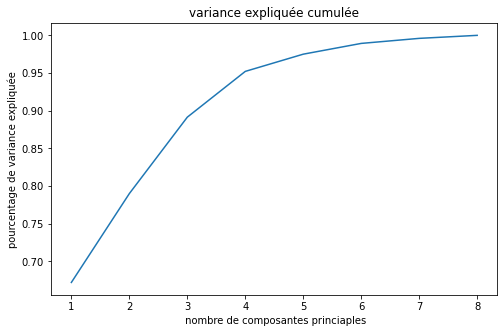

In [44]:
plt.figure(figsize=(8,5))
plt.plot(range(1,9), np.cumsum(pca.explained_variance_ratio_))
plt.title("variance expliquée cumulée")
plt.xlabel(" nombre de composantes princiaples")
plt.ylabel("pourcentage de variance expliquée")

#### 2.2) ACP avec 3 composantes principales

In [45]:
pca = PCA(random_state=42, n_components=3)
pca.get_params(deep=True)


{'copy': True,
 'iterated_power': 'auto',
 'n_components': 3,
 'random_state': 42,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [46]:
X_pca = pca.fit_transform(X_scale)

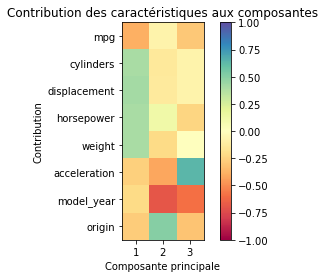

In [47]:
#fig, ax = plt.subplots(figsize=(4,4))
#plt.figure(figsize=(12,4))

plt.imshow(pca.components_.T,cmap = "Spectral",vmin= -1,vmax= 1)
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(3), range(1,4))
plt.xlabel("Composante principale")
plt.ylabel("Contribution")
plt.title("Contribution des caractéristiques aux composantes")
plt.colorbar()


Commentaire : 
- les variables les plus contributives dans la première composante principale sont : 

"cylinders", "displacement", "horsepower", et "weight"

- "origin" est la plus contributive dans la deuxième composante principale

- "accelartion" est la plus contributive dans la troisième composante principale

#### 2.2) Projection dans un espace 2D

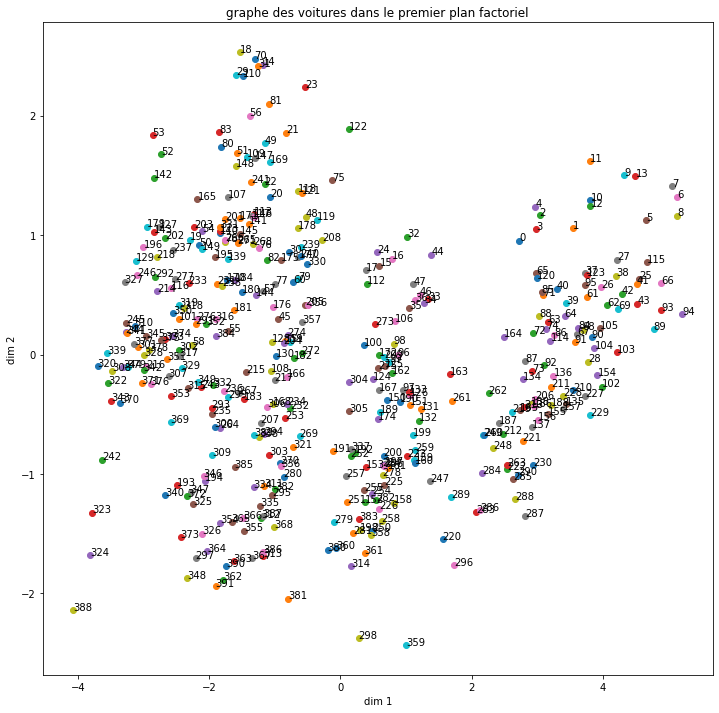

In [48]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
for i in range(len(X_pca)):
        x,y = X_pca[i,0], X_pca[i,1]
        ax.scatter(x,y)
        #ax.text(x,y,df3.iloc[i,-1])
        ax.text(x,y,i)
#plt.vlines([0],[-30],[70])
#plt.hlines([0],[-60],[80])
plt.title("graphe des voitures dans le premier plan factoriel")
plt.xlabel("dim 1")
plt.ylabel("dim 2")
plt.show()

#### 3) K-means

In [49]:
from sklearn.cluster import KMeans
km = KMeans(init="k-means++", n_clusters=3, n_init=4)
km.get_params(deep=True)

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 4,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [50]:
km.fit(X_pca)

KMeans(n_clusters=3, n_init=4)

In [51]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2,
       2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,

In [52]:
pd.DataFrame({"cluster" :km.labels_ }, index=df3.iloc[:,-1])

,cluster
car name,
chevrolet chevelle malibu,0
buick skylark 320,0
plymouth satellite,0
amc rebel sst,0
ford torino,0
...,...
ford mustang gl,2
vw pickup,2
dodge rampage,2


#### 4) Affichage des clusters 

In [53]:
data_X_pca = pd.DataFrame(X_pca, columns=["comp 1","comp 2", "comp 3"])
data_X_pca

,comp 1,comp 2,comp 3
0,2.718381,0.953771,0.213581
1,3.541591,1.061427,-0.035230
2,3.035163,1.166696,-0.149187
3,2.980879,1.052720,0.167818
4,2.970571,1.239287,-0.154942
...,...,...,...
387,-1.178756,-1.354619,-0.646009
388,-4.069557,-2.142577,0.661808
389,-1.317097,-0.675171,-1.746464
390,-1.747468,-1.773452,0.069724


In [54]:
data_X_pca["cluster"] = km.labels_
data_X_pca

,comp 1,comp 2,comp 3,cluster
0,2.718381,0.953771,0.213581,0
1,3.541591,1.061427,-0.035230,0
2,3.035163,1.166696,-0.149187,0
3,2.980879,1.052720,0.167818,0
4,2.970571,1.239287,-0.154942,0
...,...,...,...,...
387,-1.178756,-1.354619,-0.646009,2
388,-4.069557,-2.142577,0.661808,2
389,-1.317097,-0.675171,-1.746464,2
390,-1.747468,-1.773452,0.069724,2


<AxesSubplot:xlabel='comp 1', ylabel='comp 2'>

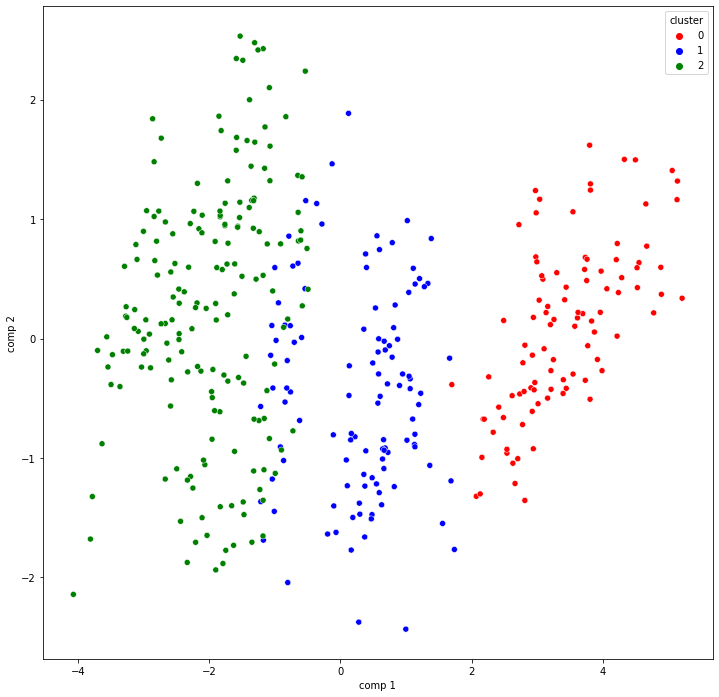

In [55]:
plt.figure(figsize=(12,12))
sns.scatterplot(data = data_X_pca, x= "comp 1", y = "comp 2" , hue = "cluster", palette= ["red","blue", "green"])

#### 5) Affichage des mesures d'erreurs 

In [56]:
from sklearn.metrics import silhouette_samples,  silhouette_score, calinski_harabasz_score, davies_bouldin_score



In [57]:
pd.DataFrame({"silhouette_score": [silhouette_score(X_pca, km.labels_)] , 
               "calinski_harabasz_score" : [calinski_harabasz_score(X_pca, km.labels_)],
               "davies_bouldin_score" :  [davies_bouldin_score(X_pca, km.labels_)]},index = ["KMeans"] )

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
KMeans,0.380776,451.488594,0.989109
